### Naver    (의류, 스포츠 용품, 화장품, 가전, 식품, 육아용품 제외)

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import nltk

### 쇼핑 인기검색어 Top10 (Daily Update)

In [2]:
url_naver = 'https://search.shopping.naver.com/best100v2/main.nhn'
res_naver = requests.get(url_naver)
soup_naver = BeautifulSoup(res_naver.content, 'html.parser')


print(url_naver)

https://search.shopping.naver.com/best100v2/main.nhn


In [3]:
top_keywords = soup_naver.find_all('span', {'class':'txt'})[:10]
for index, keyword_tag in enumerate(top_keywords):
    print('{}위 : {}'.format(index+1, keyword_tag.get_text()))

1위 : KF94 마스크
2위 : 마스크 스트랩
3위 : 마스크
4위 : 헤드셋
5위 : 면도기
6위 : KF80 마스크
7위 : 비접촉 체온계
8위 : 닌텐도 스위치
9위 : KF94 마스크 100매
10위 : 비말차단마스크


### 주방용품 Top 100

In [4]:
url_naver_kit = 'https://search.shopping.naver.com/best100v2/detail.nhn?catId=50000061'

res_naver_kit = requests.get(url_naver_kit)
soup_naver_kit = BeautifulSoup(res_naver_kit.content, 'html.parser')
data_naver_kit = soup_naver_kit.select('#productListArea > ul > li > p > a')

print(url_naver_kit)

https://search.shopping.naver.com/best100v2/detail.nhn?catId=50000061


In [5]:
item_list_naver_kit = []
for item in data_naver_kit:
    items_naver_kit = item.get_text()
    item_list_naver_kit.append(items_naver_kit)           

item_list_naver_kit

['스타벅스 DT 스탠리 스트로 보온병 591ml',
 '램프쿡 자동회전냄비',
 '포유아이엔씨 포유 킵 대용량텀블러 900ml',
 '스타벅스 SS 엘마 헤리티지 텀블러 473ml',
 '써모스 보온도시락 TKLF-1200F',
 '스탠리 어드벤처 진공 퀜처 887미리',
 '휘슬러 5인 수저세트 코리안 커트러리 10p',
 '스타벅스 SS DW 그린 워드마크 투고 텀블러...',
 '써모스 보온도시락 TKLD-1601F',
 '씨앤티커머스 리브라 주방 전자저울 LS301',
 '세모금 종이컵 4000매',
 '스타벅스 컬러체인징 리유저블 콜드컵세트 ...',
 '스타벅스 스텐 콜드컵 473ml',
 '스타벅스 SS 블랙 헤리티지 뉴턴 텀블러 35...',
 '스타벅스 SS 콩코드 사이렌 화이트 텀블러 ...',
 '테팔 스페셜 에디션 3종세트',
 '써모스 원터치머그 텀블러 보온보냉병 0.4L...',
 '카스 전자저울 WZ-2D',
 '드롭스 IH 프라이팬',
 '포트메리온 보타닉가든 악센트볼 5P',
 '슈나츠 5종 세라믹 코팅 칼 세트',
 '조지루시 초슬림 원터치 보온보냉병 360ml ...',
 '벨리체 식기건조대 소형',
 '스타벅스 SS 그린 처비 핸들 텀블러 473ml',
 '써모스 원터치 머그형 보온보냉병 0.5L JNL...',
 '벨라쿠진 잼팟 6L + 유리뚜껑 세트',
 '요리즐 슬렌더 소금 후추 그라인더',
 '몽블랑 에펠 프리미엄 에디션 수저세트 2p',
 '틸만 인덕션 전용 프라이팬',
 '드레텍 주방저울 KS-605',
 '락앤락 슬림 양념통 6P세트 (HPL949S6)',
 'NHB 그라인더 1P',
 '지앤지비 필모아 록키 텀블러 900ml',
 '트라이앵글 줄리엔 커터',
 '해피콜 샤인블랙 다이아몬드코팅 포셀 프라...',
 '헹켈 아시아형 2종 세트 HK30144-000',
 '스타벅스 SS 에치드 텀블러 473ml',
 '가쿠리 토리베가위 KS-203',
 '제이비제이 코모드 2단 식기건조대 기본형',
 '진한공업 도

In [6]:
str_itemlist_naver_kit = str(item_list_naver_kit)
tokenized_naver_kit = nltk.word_tokenize(str_itemlist_naver_kit)
word_dic_naver_kit = {}

for word in tokenized_naver_kit:
    if word not in word_dic_naver_kit:
        word_dic_naver_kit[word] = 1 
    else:
        word_dic_naver_kit[word] += 1
        
sorted_word_dic_naver_kit = sorted(word_dic_naver_kit.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_naver_kit[:50]:
    print("{0}({1})".format(word, count), end=" ")

'(100) ,(99) ...(19) '스타벅스(17) 텀블러(17) SS(10) 세트(8) '해피콜(8) 473ml(7) 프라이팬(6) 식기건조대(6) '락앤락(5) '써모스(4) 진공(4) 전자저울(4) IH(4) 1P(4) 포셀(4) 2단(4) 900ml(3) 헤리티지(3) '스탠리(3) 주방(3) 화이트(3) 보온보냉병(3) '포트메리온(3) 다이아몬드(3) '한샘(3) 클래식(3) 보온병(2) 591ml(2) 엘마(2) 보온도시락(2) 수저세트(2) DW(2) 그린(2) 워드마크(2) 투고(2) '씨앤티커머스(2) 리브라(2) 리유저블(2) 스텐(2) 콜드컵(2) 블랙(2) 35(2) '테팔(2) 에디션(2) 보타닉가든(2) 칼(2) 원터치(2) 

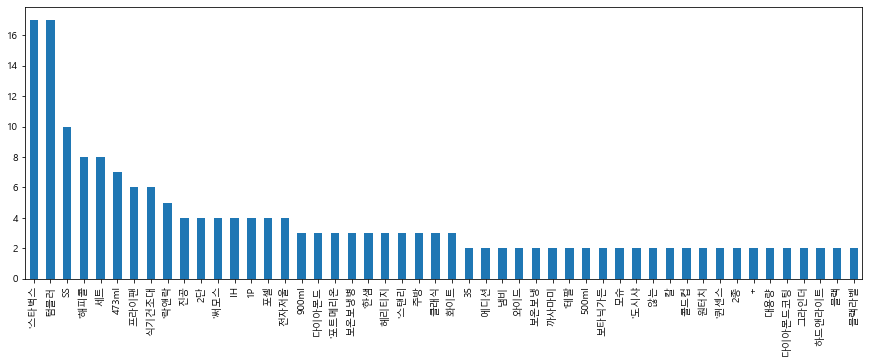

In [8]:
word_frequency_naver_kit = nltk.FreqDist(word_dic_naver_kit)
font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

naver_kit_df = pd.DataFrame(list(word_frequency_naver_kit.values()), word_frequency_naver_kit.keys())
result_naver_kit = naver_kit_df.sort_values([0], ascending=False)

result_naver_kit[3:53].plot(kind='bar', legend=False, figsize=(15,5))
plt.show()

### 가구, 인테리어 Top 100

In [9]:
url_naver_fur = 'https://search.shopping.naver.com/best100v2/detail.nhn?catId=50000004&listType=B10002'

res_naver_fur = requests.get(url_naver_fur)
soup_naver_fur = BeautifulSoup(res_naver_fur.content, 'html.parser')
data_naver_fur = soup_naver_fur.select('#productListArea > ul > li > p > a')

print(url_naver_fur)

https://search.shopping.naver.com/best100v2/detail.nhn?catId=50000004&listType=B10002


In [10]:
item_list_naver_fur = []
for item_fur in data_naver_fur:
    items_naver_fur = item_fur.get_text()
    item_list_naver_fur.append(items_naver_fur)           

item_list_naver_fur

['왕자행거 2단 너비조절기획 행거',
 '티단추 기구 T단추 SET',
 '해바라기 그림 액자 황금 배경 B 돈나무 부...',
 '엠델 우리하루 큐어백 플러스 등받이쿠션',
 '수면공감 우유베개 라텍스 기능성 경추',
 '엔젤키드 슬라이딩 어드밴스 뉴프리미엄 침...',
 '팜데코 삼각 등받이쿠션 침대 쇼파',
 '아이엔지가구 알렉스 1200 높은 수납장',
 '미드브로 에어컨 실외기 커버 열차단 절전 ...',
 '스스디 슬라이딩 틈새수납장',
 '퓨어앤슬립 천연라텍스베개',
 '투케이 규조토 발매트 욕실 화장실 다혈질냥...',
 '유즈 삼각 등쿠션 9컬러 에어메쉬 등받이 침...',
 '솜포함 순면 원형 롱쿠션 바디필로우 피그먼...',
 '아워리빙 4색상 테니스공 의자다리커버 의자...',
 '어니우니 그리드 라지자 캔들워머',
 '아이엔지가구 알렉스 월플렉스 시스템 수납...',
 '이케아 MULIG 행거',
 '왕자행거 원터치 4단 조절 행거 38mm',
 '오피스존 투명 가림판 책상 급식실 가림막 ...',
 'DIY 명화그리기 그림 액자 팝아트 유화 퍼즐...',
 '비카데코데크타일 조립식마루바닥재',
 '썬그립 티단추 13컬러 똑딱이',
 '한샘 샘키즈 수납장 1305 모던',
 '시예로 1+1 홈바의자 바스툴 CR-B227 빈티지...',
 '삼익가구 U자형 바디필로우 레그필로우',
 '카이르 홈 국산 LG 젤 여름 아이스 냉 쿨젤...',
 '하나리빙 데코 우드타일 접착식 22장세트',
 '리빈 에어컨 실외기 절전 덮개 커버 차양막...',
 '플라이토 3D LED 무소음 벽걸이시계',
 '아이엠듀 엘듀 LED 수유등 취침등 무드등',
 '황금 해바라기 돈나무 사과 인테리어 액자 ...',
 '알파 심플 합성피혁 친환경 인조가죽 레자 ...',
 '루피 Luffy 종이실',
 '이케아 LERBERG 와이드 철제 4단선반',
 '스테이의자/식탁의자/카페 책상의자/컴퓨터',
 '더프리그 로망스 물세탁 사계절 심플 단모 ...',
 '왕자행거

In [11]:
str_itemlist_naver_fur = str(item_list_naver_fur)
tokenized_naver_fur = nltk.word_tokenize(str_itemlist_naver_fur)
word_dic_naver_fur = {}

for word in tokenized_naver_fur:
    if word not in word_dic_naver_fur:
        word_dic_naver_fur[word] = 1 
    else:
        word_dic_naver_fur[word] += 1
        
sorted_word_dic_naver_fur = sorted(word_dic_naver_fur.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_naver_fur[:50]:
    print("{0}({1})".format(word, count), end=" ")
    

'(100) ,(99) ...(40) '아이엔지가구(6) 행거(5) 침대(5) '왕자행거(4) 삼각(4) 1200(4) 수납장(4) 조절(4) 원목(4) 모음전(4) T단추(3) 액자(3) 등받이쿠션(3) 기능성(3) 경추(3) 슬라이딩(3) 알렉스(3) 의자(3) '이케아(3) 티단추(3) '한샘(3) 쿨젤(3) LED(3) 2단(2) 그림(2) 황금(2) 돈나무(2) 침(2) 에어컨(2) 실외기(2) 커버(2) 절전(2) 규조토(2) 발매트(2) 욕실(2) 화장실(2) 등받이(2) 순면(2) 롱쿠션(2) 바디필로우(2) 테니스공(2) 의자다리커버(2) 라지자(2) 수납(2) 4단(2) 38mm(2) 책상(2) 

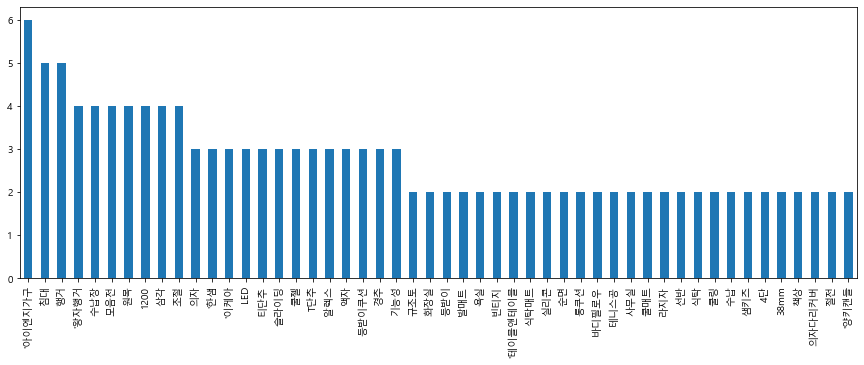

In [12]:
word_frequency_naver_fur = nltk.FreqDist(word_dic_naver_fur)
font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

naver_df_fur = pd.DataFrame(list(word_frequency_naver_fur.values()), word_frequency_naver_fur.keys())
result_naver_fur = naver_df_fur.sort_values([0], ascending=False)
result_naver_fur[3:53].plot(kind='bar', legend=False, figsize=(15,5))
plt.show()

### 생활 / 건강 Top 100

In [13]:
url_naver_life = 'https://search.shopping.naver.com/best100v2/detail.nhn?catId=50000008&listType=B10002'

res_naver_life = requests.get(url_naver_life)
soup_naver_life = BeautifulSoup(res_naver_life.content, 'html.parser')
data_naver_life = soup_naver_life.select('#productListArea > ul > li > p > a')

print(url_naver_life)

https://search.shopping.naver.com/best100v2/detail.nhn?catId=50000008&listType=B10002


In [14]:
item_list_naver_life = []
for item_life in data_naver_life:
    items_naver_life = item_life.get_text()
    item_list_naver_life.append(items_naver_life)           

item_list_naver_life

['미마 보건용 마스크 KF94',
 '이디엘 제로베이 미세 황사 마스크 KF94',
 '암웨이 글리스터 치약 200g',
 '이지숨 KF94 황사 미세먼지 방역 마스크',
 '3M 8822 1급 방진마스크',
 '미마마스크 미마 마스크 KF94',
 '베리어 15W 고속 무선충전 차량용 휴대폰 거...',
 '주파집 차량용 센서 무선 고속충전거치대 Q...',
 '에어퀸 황사 마스크 플러스 KF80',
 '센소다인 멀티케어 치약 100g',
 '베리어 마그네틱 차량용 핸드폰 거치대 일반...',
 'P&G 다우니 엑스퍼트 실내건조 섬유유연제 ...',
 '아이엠듀 차량용 무선충전 거치대 15W WCH1',
 '로랜텍 텔포 퀄컴3.0 듀얼 차량용 고속충전...',
 '닥터웰 에어라이너 공기압마사지기 HDW-500...',
 '메디탑 3M 새니타이저 손소독제 500ml',
 '더블에이 A4용지 복사용지 80g 2500매',
 '스타벅스 DT 스탠리 스트로 보온병 591ml',
 'MF매직하우스 고리회전형 논슬립 옷걸이',
 '그린월드팜 클리닉크린겔 손소독제 500ml',
 '주파집 퀄컴 QC 3.0 듀얼 차량용 고속 충전...',
 '유한킴벌리 크리넥스 비말차단 에어마스크 ...',
 '한울생약 닥터스 손소독티슈 30매',
 '베리어 차량용 공기청정기',
 'ROCHE 아큐첵 액티브 혈당시험지 50매',
 'SK루브리컨츠 지크 탑 5W30 1L',
 '크리넥스 뉴 순수 소프트 3겹 화장지 27m 3...',
 '켄트 오리지널 초극세모 칫솔',
 '메이튼 차량용 핸드폰 고속 무선충전 거치대...',
 '한국제지 밀크 A4용지 75g 5000매',
 '램프쿡 자동회전냄비',
 '엘지생활건강 페리오 뉴 후레쉬 알파 치약 ...',
 '늘푸른 KF94 마스크',
 '더블에이 A4복사용지 80g 4000매',
 '디스산업 시나몬이오 숨프리 황사 마스크 K...',
 '그랜즈레미디 발냄새 제거제 50g',
 '와이엠 황사보건용 마스크 KF94',
 '케이엠모터스 충잘 무선

In [15]:
str_itemlist_naver_life = str(item_list_naver_life)
tokenized_naver_life = nltk.word_tokenize(str_itemlist_naver_life)
word_dic_naver_life = {}

for word in tokenized_naver_life:
    if word not in word_dic_naver_life:
        word_dic_naver_life[word] = 1 
    else:
        word_dic_naver_life[word] += 1
        
sorted_word_dic_naver_life = sorted(word_dic_naver_life.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_naver_life[:50]:
    print("{0}({1})".format(word, count), end=" ")

'(103) ,(99) ...(28) 차량용(11) 마스크(9) 치약(7) KF94(6) A4용지(5) 80g(5) 황사(4) 고속(4) 무선충전(4) 거치대(4) 500ml(4) '더블에이(4) 혈당시험지(4) 1L(4) 5000매(4) 200g(3) '베리어(3) '아이엠듀(3) 복사용지(3) '유한킴벌리(3) 크리넥스(3) 'ROCHE(3) 아큐첵(3) 5W30(3) 뉴(3) '한국제지(3) 4000매(3) 그레인프리(3) 어덜트(3) '3M(2) 방진마스크(2) 15W(2) '주파집(2) 플러스(2) KF80(2) 핸드폰(2) 일반(2) P(2) &(2) G(2) 다우니(2) 듀얼(2) 손소독제(2) '스타벅스(2) 논슬립(2) 공기청정기(2) 50매(2) 

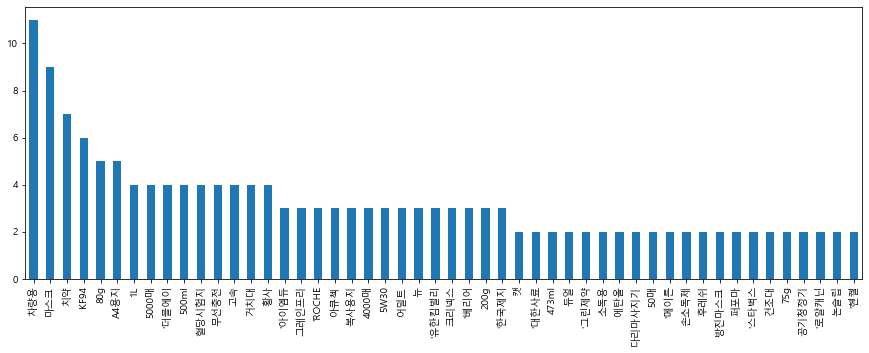

In [16]:
word_frequency_naver_life = nltk.FreqDist(word_dic_naver_life)
font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

naver_df_life = pd.DataFrame(list(word_frequency_naver_life.values()), word_frequency_naver_life.keys())
result_naver_life = naver_df_life.sort_values([0], ascending=False)
result_naver_life[3:53].plot(kind='bar', legend=False, figsize=(15,5))
plt.show()